In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv('./train.csv')
train.head(10)

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09
5,2019-08-05,1.243150e+09,-1.488550e+09,1.528018e+11,-1.362008e+11,3.0,1.128248e+12,8.245192e+11,1.217677e+10,6.655014e+11,3.135744e+11,2.774827e+11,3.628850e+09
6,2019-08-06,5.588000e+08,-7.748000e+08,5.824773e+10,-7.330623e+10,3.0,1.095004e+12,8.152918e+11,1.370673e+10,6.658978e+11,3.135744e+11,2.624242e+11,3.412850e+09
7,2019-08-07,4.885500e+08,-6.524000e+08,6.908465e+10,-4.941545e+10,3.0,1.039522e+12,8.152671e+11,1.368468e+10,6.631276e+11,3.306770e+11,2.820934e+11,3.249000e+09
8,2019-08-08,7.225000e+08,-7.243000e+08,2.739569e+11,-7.422430e+10,3.0,1.149508e+12,8.320695e+11,1.209604e+10,6.511642e+11,3.306770e+11,4.818260e+11,3.247200e+09
9,2019-08-09,8.567000e+08,-6.403500e+08,1.582058e+09,-1.529425e+09,3.0,1.153623e+12,8.320651e+11,1.227710e+10,6.451139e+11,3.306770e+11,4.818786e+11,3.463550e+09


# Visualize data

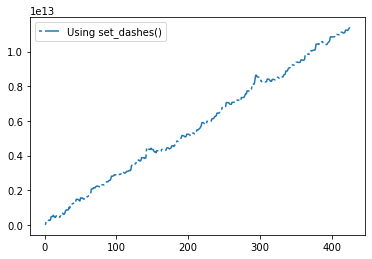

In [16]:
# x = np.linspace(0, 10, 500)
# y = np.sin(x)
x = np.arange(1, 426, 1)
y = train['kas_kantor']

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
# line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend()
plt.show()


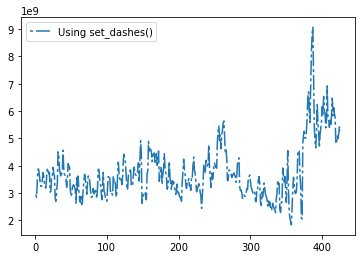

In [18]:
x = np.arange(1, 426, 1)
y = train['kas_echannel']

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
# line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend()
plt.show()


In [19]:
from scipy.fft import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

# fourier transform algorithm example

In [23]:
import numpy as np
from numpy import fft

# source https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

sample dataset

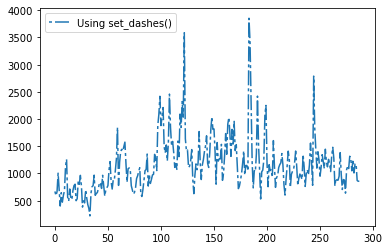

In [33]:
y = np.array([669, 592, 664, 1005, 699, 401, 646, 472, 598, 681, 1126, 1260, 562, 491, 714, 530, 521, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, 1256, 1009, 1175, 1176, 870, 856, 860])
x = np.arange(y.size)

fig, ax = plt.subplots()

line1, = ax.plot(x, y, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.legend()
plt.show()


prediction

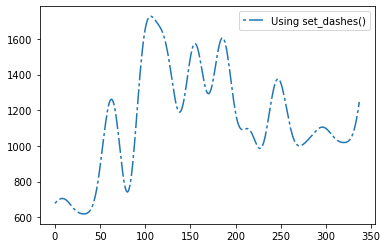

In [41]:
n_predict = 50
y_extrapolation = fourierExtrapolation(y, n_predict)
x = np.arange(y_extrapolation.size)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y_extrapolation, label='Using set_dashes()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.legend()
plt.show()


# predict cr-optimization using fourier transform

## kas_kantor

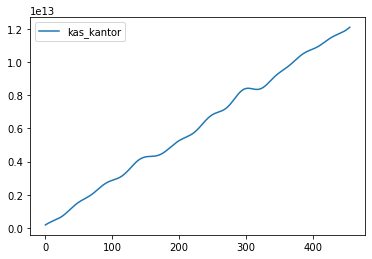

In [45]:
n_predict = 31
y_kas_kantor = fourierExtrapolation(train['kas_kantor'], n_predict)
x = np.arange(y_kas_kantor.size)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y_kas_kantor, label='kas_kantor')

ax.legend()
plt.show()


In [49]:
y_kas_kantor[-31:]

array([1.14183073e+13, 1.14438848e+13, 1.14685268e+13, 1.14922018e+13,
       1.15149019e+13, 1.15366425e+13, 1.15574627e+13, 1.15774241e+13,
       1.15966103e+13, 1.16151246e+13, 1.16330886e+13, 1.16506393e+13,
       1.16679267e+13, 1.16851105e+13, 1.17023569e+13, 1.17198351e+13,
       1.17377140e+13, 1.17561586e+13, 1.17753265e+13, 1.17953648e+13,
       1.18164065e+13, 1.18385686e+13, 1.18619488e+13, 1.18866237e+13,
       1.19126472e+13, 1.19400492e+13, 1.19688350e+13, 1.19989850e+13,
       1.20304549e+13, 1.20631769e+13, 1.20970603e+13])

## kas_echannel

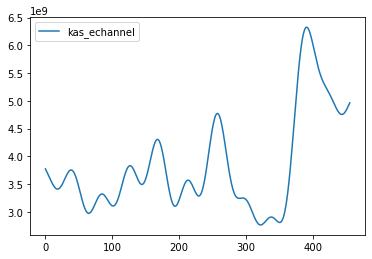

In [50]:
n_predict = 31
y_kas_echannel = fourierExtrapolation(train['kas_echannel'], n_predict)
x = np.arange(y_kas_echannel.size)

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y_kas_echannel, label='kas_echannel')

ax.legend()
plt.show()


In [51]:
y_kas_echannel[-31:]

array([5.11861880e+09, 5.09457945e+09, 5.06980255e+09, 5.04434137e+09,
       5.01831168e+09, 4.99188889e+09, 4.96530338e+09, 4.93883420e+09,
       4.91280134e+09, 4.88755671e+09, 4.86347410e+09, 4.84093833e+09,
       4.82033402e+09, 4.80203405e+09, 4.78638814e+09, 4.77371185e+09,
       4.76427624e+09, 4.75829839e+09, 4.75593325e+09, 4.75726676e+09,
       4.76231061e+09, 4.77099878e+09, 4.78318584e+09, 4.79864722e+09,
       4.81708140e+09, 4.83811401e+09, 4.86130372e+09, 4.88614989e+09,
       4.91210175e+09, 4.93856899e+09, 4.96493343e+09])

# Make Submissions

In [58]:
submission_index = np.arange(0, 62, 1)
submission_value = np.concatenate((y_kas_kantor[-31:], y_kas_echannel[-31:]), axis=0)
submission_data = {
    'index': submission_index,
    'value': submission_value
}
submission_df = pd.DataFrame(data=submission_data)
submission_df

,index,value
0,0,1.141831e+13
1,1,1.144388e+13
2,2,1.146853e+13
3,3,1.149220e+13
4,4,1.151490e+13
...,...,...
57,57,4.861304e+09
58,58,4.886150e+09
59,59,4.912102e+09
60,60,4.938569e+09


In [59]:
submission_df.to_csv('./my_submission.csv', index=False)